In [9]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats


In [10]:
x = [8, 0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8, 0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [11]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print (y)
print(y_with_nan)
print(z_with_nan)

[ 8.   0.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [12]:
mean = sum(x) / len(x)
mean

7.25

In [13]:
mean_ = statistics.mean(x)
mean_

7.25

In [15]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [17]:
statistics.median(x_with_nan)

6.0

In [19]:
mean_ = np.mean(y) #function call
mean_

7.25

In [20]:
mean_ = y.mean() #method call
mean_

7.25

In [22]:
#treat nan dengan berbeda call, hasilnya tetep sama
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [24]:
print (sum(x))
print (len(x))
print (sum(x) / len(x))
print ((sum(x) + 0) / (len(x) + 1))

43.5
6
7.25
6.214285714285714


In [25]:
np.nanmean (x_with_nan)

8.7

## MEASURES OF TENDENCY

### MEAN
- arimatrik mean dijumlah
- outlayer sangat berdampak pada mean

In [26]:
mean_ = z.mean()
mean_

7.25

In [27]:
np.mean(z_with_nan)

8.7

In [28]:
np.mean(z_with_nan.to_numpy())

nan

### WEIGHTED MEAN

In [29]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [30]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range (len(x))) /sum(w) 
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x,w)) / sum(w)
print(wmean)

6.95
6.95


In [31]:
dict(zip(x, w))

{8.0: 0.1, 1: 0.2, 2.5: 0.3, 4: 0.25, 28.0: 0.15}

In [32]:
list(zip(x, w))

[(8.0, 0.1), (1, 0.2), (2.5, 0.3), (4, 0.25), (28.0, 0.15)]

In [33]:
#kalo di looping
for x_, w_ in (zip(x, w)):
    print(x_ * w_)

0.8
0.2
0.75
1.0
4.2


In [40]:
w_sum = []
for x_, w_ in (zip(x, w)):
    w_sum.append(x_ * w_)
    print(sum(w))
    print(sum(w_sum) / sum(w))

1.0
0.8
1.0
1.0
1.0
1.75
1.0
2.75
1.0
6.95


In [42]:
[(x_ * w_) for x_,w_ in (zip(x,w))]
print(sum(w))
print(sum(w_sum) / sum(w))

1.0
6.95


bedanya () sama [] adalah

In [44]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

np.average(y, weights=w) #numpy
print(wmean)

np.average(z, weights=w)
print(wmean)

6.95
6.95


In [45]:
w * y

array([0.8 , 0.2 , 0.75, 1.  , 4.2 ])

In [46]:
x

[8.0, 1, 2.5, 4, 28.0]

- numpy bisa dikali list tapi 
- list gabisa dikali list

In [49]:
sum(w * y) / sum(w)

6.95

In [50]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [53]:
np.sort(y)

array([ 1. ,  2.5,  4. ,  8. , 28. ])

In [55]:
print(y.mean())
print(np.median(y))

8.7
4.0


### HARMONIC MEAN
- outlayer tidak berdampak

In [52]:
#harmonic mean, digunakan untuk menghandle outlayer
len(y) / sum(1 / y)

2.7613412228796843

In [56]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [57]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [60]:
scipy.stats.hmean(y)

2.7613412228796843

### GEOMETRIC MEAN
- rasio
- ada di antara mean dan harmonic mean

In [64]:
x

[8.0, 1, 2.5, 4, 28.0]

In [65]:
sum(x) ** (1/5)

2.1266589658724633

In [63]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [66]:
print(scipy.stats.gmean(y))
print(scipy.stats.gmean(z))

4.67788567485604
4.67788567485604


### MEDIAN
- outlayer semakin kecil, maka mean dan median akan semakin dekat

In [67]:
if 0:
    print("gajalan")

In [68]:
if 5:
    print("jalan")

jalan


In [71]:
x

[8.0, 1, 2.5, 4, 28.0]

In [70]:
sorted(x)

[1, 2.5, 4, 8.0, 28.0]

In [73]:
(len(x) - 1 )

4

In [69]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [79]:
statistics.median(x)

4

In [80]:
x[:-1]

[8.0, 1, 2.5, 4]

In [81]:
statistics.median(x[:-1])

3.25

In [85]:
statistics.median_low(x[:-1]) #kalo datanya genap

2.5

In [86]:
statistics.median_high(x[:-1]) #kalo datanya ganjil

4

In [87]:
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

In [89]:
sorted(x_with_nan)

[1, 2.5, 4, 8.0, nan, 28.0]

In [92]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


### MODUS

In [166]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [167]:
mode_ = statistics.mode(u)

In [168]:
u, v = np.array(u), np.array(v)

mode_ =scipy.stats.mode(u, keepdims=True)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [169]:
mode_ =scipy.stats.mode(v, keepdims=True)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [170]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [173]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


In [174]:
v.sort_values()

0    12
2    12
6    12
1    15
3    15
5    15
4    21
dtype: int64

## MEASURES OF VARIABILITY

### VARIANCE

In [102]:
print(sorted(x))


[1, 2.5, 4, 8.0, 28.0]


In [101]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_) **2 for item in x) / n-1
var_

97.55999999999999

In [104]:
var_ = statistics.variance(x)
var_

123.2

In [103]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [108]:
np.median(y, keepdims=True) #function call

array([4.])

In [109]:
z.var(ddof=1)

123.19999999999999

In [111]:
help(pd.Series.var)

Help on function var in module pandas.core.generic:

var(self, axis=None, skipna=True, level=None, ddof=1, numeric_only=None, **kwargs)
    Return unbiased variance over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument.
    
    Parameters
    ----------
    axis : {index (0)}
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a scalar.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -------
    s

In [112]:
help(np.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  Fo

### STANDARD DEVIATION

In [113]:
std_ = var_ ** 0.5
std_

11.099549540409287

In [116]:
np.std(y, ddof=1)

11.099549540409285

In [117]:
y.std(ddof=1)

11.099549540409285

In [118]:
z.std()

11.099549540409285

In [119]:
z.std(ddof=1)

11.099549540409285

### SKEWNESS
- ketarik ke kanan berarti positif
- ketarik ke kiri berarti negatif

- kalo data berdistribusi normal berarti mendekati 0

In [175]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

In [176]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [177]:
scipy.stats.skew(np.array(x_with_nan), )

nan

In [178]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64>

In [179]:
z_with_nan.skew()

1.9470432273905924

### PERCENTILES

In [187]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [188]:
statistics.quantiles(x)

[-0.5, 8.0, 23.4]

In [189]:
statistics.quantiles(x, n=2)

[8.0]

In [190]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [191]:
statistics.quantiles(x, n=4, method='exclusive')

[-0.5, 8.0, 23.4]

In [132]:
np.quantile(x, [0.25, 0.5, 0.75]) #range 0-1

array([ 0.1,  8. , 21. ])

In [131]:
np.percentile(x, 5) #5 persen

-3.44

In [193]:
y = np.array(x)
np.percentile(x, (5, 25, 50, 75))

array([-3.44,  0.1 ,  8.  , 21.  ])

In [196]:
np.sort(y_with_nan)

array([ 1. ,  2.5,  4. ,  8. , 28. ,  nan])

In [198]:
y = np.array(x)
y_with_nan = np.insert(y, 2, np.nan)

In [199]:
np.sort(y_with_nan)

array([-5. , -1.1,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ,  nan])

In [200]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [201]:
np.percentile(y_with_nan, [25, 50, 75])

array([nan, nan, nan])

In [202]:
print(np.quantile(y, 0.5))
print(np.quantile(y, 0.95))

8.0
34.919999999999995


In [203]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [211]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

In [213]:
z.quantile(0.95)

34.919999999999995

In [212]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [205]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

In [206]:
quartiles = np.quantile(y, [0.25, 0.75])
print(quartiles)
print(quartiles[0])
print(quartiles[1])
print(quartiles[1] - quartiles[0])

[ 0.1 21. ]
0.1
21.0
20.9


In [207]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

5.5

### RANGE

In [152]:
data nya tadi diganti dulu di bagian percentilenya


SyntaxError: invalid syntax (2799542735.py, line 1)

In [214]:
z

0    -5.0
1    -1.1
2     0.1
3     2.0
4     8.0
5    12.8
6    21.0
7    25.8
8    41.0
dtype: float64

In [215]:
print(np.ptp(y))
print(np.ptp(z))
print(np.ptp(y_with_nan))
print(np.ptp(z_with_nan))

46.0
46.0
nan
nan


In [216]:
type(z_with_nan)

pandas.core.series.Series

In [217]:
type(y_with_nan)

numpy.ndarray

In [218]:
np.max(y) 

41.0

In [219]:
np.max(y) - np.min(y)

46.0

np.max sama np.amax itu sama

- max() dan min() bawaan dari python standard library
- amax() dan amin() bawaan dari NumPy
- nanmax() dan nanmin() dari NumPy untuk mengabaikan nan values
- max() dan .min() bawaan dari NumPy
- max() dan .min() bawaan dari Pandas untuk abaikan nan values by default

In [220]:
np.amax(y)

41.0

In [222]:
z_with_nan.min()

-5.0

In [221]:
z.describe()

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

## MEASURES OF CORRELATION

In [223]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

### COVARIANCE

In [224]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [225]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [226]:
print(x_.var(ddof=1))
print(y_.var(ddof=1))

38.5
13.914285714285711


In [227]:
cov_xy = cov_matrix[0, 1]
print(cov_xy)

cov_xy = cov_matrix[1, 0]
print(cov_xy)

19.950000000000003
19.950000000000003


In [228]:
cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)

19.950000000000003
19.950000000000003


### CORRELATION COEFFICIENT

In [229]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
print(var_x, var_y)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
print(std_x, std_y)
r = cov_xy / (std_x * std_y)
print(r)

38.5 13.914285714285711
6.2048368229954285 3.7301857479602423
0.8619500056316062


In [230]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.8619500056316058
5.122760847201207e-07


In [231]:
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

[[1.         0.86195001]
 [0.86195001 1.        ]]


In [232]:
result = scipy.stats.linregress(x_, y_)
print(result)

LinregressResult(slope=0.5181818181818182, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)


In [233]:
print(result.rvalue)
print(result.pvalue)

0.861950005631606
5.122760847201164e-07


In [234]:
r = x__.corr(y__, method='pearson')
print(r)

r = y__.corr(x__, method='pearson')
print(r)

0.8619500056316061
0.8619500056316061


In [235]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

In [236]:
a.shape

(5, 3)

In [237]:
a.mean()

5.4

In [238]:
np.median(a)

2.0

In [239]:
a.var(ddof=1)

53.40000000000001

In [240]:
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

[6.2 8.2 1.8]
[ 1.  2.  5. 13.  6.]


In [241]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [242]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [243]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [244]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [245]:
df["A"].std() - df["A"].var() ** 0.5

0.0

In [246]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


### VISUALIZATION

In [250]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [251]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

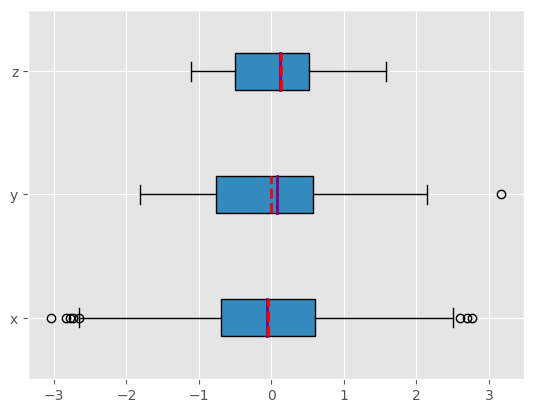

In [252]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()